In [128]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from IPython.display import clear_output
from sklearn.metrics import mean_absolute_error as MAE
import glob
import pandas as pd

In [129]:
def dataframe_generetor(df,i):
    name = i.split(' ')[1].split('/')[1].split('_')[0]
    columns = list(df.columns)[0].split(';')
    a = {}
    for column in range(len(columns)):
        b = []
        for row in range(len(df)):        
            element = df.iloc[row,0].split(';')[column]
            b.append(element)
        a['name' + str(column)] = b
        
    columns = [item + ' ' + str(name) for item in columns]
    df2 = pd.DataFrame(a)
    df2.columns = columns
    return df2

In [130]:
directoryPath = '/home/alireza/Desktop/ML/digital currency/CoinGecko/'
files = glob.glob(directoryPath + '*.csv')

df_list = []
for i in files:
    name = i.split(' ')[1].split('/')[2].split('-')[0]
    df = pd.read_csv(i)
    columns = list(df.columns)
    columns = [f'{name}: ' + i for i  in columns]
    columns[0] = 'time'
    df.columns = columns
    if name == 'ltc':
        df_base = df
    #df = dataframe_generetor(df,i)
    
    df_list.append(df)

df_list[0]

,time,ldo: price,ldo: market_cap,ldo: total_volume
0,2021-01-05 00:00:00 UTC,1.750891,5.193326e+06,1.258283e+07
1,2021-01-06 00:00:00 UTC,1.750891,5.193326e+06,1.258283e+07
2,2021-01-07 00:00:00 UTC,1.760411,5.667692e+06,6.423586e+06
3,2021-01-08 00:00:00 UTC,1.426809,4.586996e+06,2.079384e+06
4,2021-01-09 00:00:00 UTC,1.495403,4.803312e+06,1.086875e+06
...,...,...,...,...
1278,2024-07-06 00:00:00 UTC,1.580343,1.414156e+09,2.391324e+08
1279,2024-07-07 00:00:00 UTC,1.632424,1.455374e+09,1.450059e+08
1280,2024-07-08 00:00:00 UTC,1.561988,1.391668e+09,1.088955e+08
1281,2024-07-09 00:00:00 UTC,1.566875,1.399165e+09,1.696455e+08


In [131]:
for i in df_list:
    df_base = df_base.merge(i, how='left', on='time')
df = df_base
df

,time,ltc: price_x,ltc: market_cap_x,ltc: total_volume_x,ldo: price,ldo: market_cap,ldo: total_volume,rndr: price,rndr: market_cap,rndr: total_volume,...,steth: total_volume,pepe: price,pepe: market_cap,pepe: total_volume,bch: price,bch: market_cap,bch: total_volume,imx: price,imx: market_cap,imx: total_volume
0,2013-04-28 00:00:00 UTC,4.299830,7.377339e+07,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-04-29 00:00:00 UTC,4.359400,7.493691e+07,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-04-30 00:00:00 UTC,4.182950,7.203764e+07,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-05-01 00:00:00 UTC,3.649140,6.295799e+07,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-05-02 00:00:00 UTC,3.388790,5.856534e+07,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4085,2024-07-06 00:00:00 UTC,61.936830,4.630196e+09,7.654681e+08,1.580343,1.414156e+09,2.391324e+08,6.383834,2.480702e+09,3.291847e+08,...,1.787486e+08,0.000009,3.736046e+09,1.529109e+09,325.952346,6.430458e+09,4.519914e+08,1.277075,1.926070e+09,6.973921e+07
4086,2024-07-07 00:00:00 UTC,65.421960,4.884010e+09,2.705074e+08,1.632424,1.455374e+09,1.450059e+08,7.008860,2.721093e+09,1.355030e+08,...,5.140462e+07,0.000010,4.091264e+09,6.866619e+08,342.856084,6.751001e+09,1.962695e+08,1.327662,2.000085e+09,4.838168e+07
4087,2024-07-08 00:00:00 UTC,61.916461,4.614807e+09,2.425418e+08,1.561988,1.391668e+09,1.088955e+08,6.342316,2.461120e+09,1.168926e+08,...,7.347860e+07,0.000008,3.510828e+09,6.256090e+08,312.152984,6.144447e+09,1.604537e+08,1.184759,1.782341e+09,4.150380e+07
4088,2024-07-09 00:00:00 UTC,64.850999,4.848614e+09,4.100916e+08,1.566875,1.399165e+09,1.696455e+08,6.363087,2.472564e+09,1.812120e+08,...,1.284292e+08,0.000009,3.870465e+09,1.604976e+09,333.220278,6.570582e+09,2.700883e+08,1.224113,1.844594e+09,6.887772e+07


In [132]:
df['target'] = df['ton: price']
df = df.drop(['ton: price'],axis=1)
df

,time,ltc: price_x,ltc: market_cap_x,ltc: total_volume_x,ldo: price,ldo: market_cap,ldo: total_volume,rndr: price,rndr: market_cap,rndr: total_volume,...,pepe: price,pepe: market_cap,pepe: total_volume,bch: price,bch: market_cap,bch: total_volume,imx: price,imx: market_cap,imx: total_volume,target
0,2013-04-28 00:00:00 UTC,4.299830,7.377339e+07,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-04-29 00:00:00 UTC,4.359400,7.493691e+07,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-04-30 00:00:00 UTC,4.182950,7.203764e+07,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-05-01 00:00:00 UTC,3.649140,6.295799e+07,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-05-02 00:00:00 UTC,3.388790,5.856534e+07,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4085,2024-07-06 00:00:00 UTC,61.936830,4.630196e+09,7.654681e+08,1.580343,1.414156e+09,2.391324e+08,6.383834,2.480702e+09,3.291847e+08,...,0.000009,3.736046e+09,1.529109e+09,325.952346,6.430458e+09,4.519914e+08,1.277075,1.926070e+09,6.973921e+07,7.213938
4086,2024-07-07 00:00:00 UTC,65.421960,4.884010e+09,2.705074e+08,1.632424,1.455374e+09,1.450059e+08,7.008860,2.721093e+09,1.355030e+08,...,0.000010,4.091264e+09,6.866619e+08,342.856084,6.751001e+09,1.962695e+08,1.327662,2.000085e+09,4.838168e+07,7.592768
4087,2024-07-08 00:00:00 UTC,61.916461,4.614807e+09,2.425418e+08,1.561988,1.391668e+09,1.088955e+08,6.342316,2.461120e+09,1.168926e+08,...,0.000008,3.510828e+09,6.256090e+08,312.152984,6.144447e+09,1.604537e+08,1.184759,1.782341e+09,4.150380e+07,7.054885
4088,2024-07-09 00:00:00 UTC,64.850999,4.848614e+09,4.100916e+08,1.566875,1.399165e+09,1.696455e+08,6.363087,2.472564e+09,1.812120e+08,...,0.000009,3.870465e+09,1.604976e+09,333.220278,6.570582e+09,2.700883e+08,1.224113,1.844594e+09,6.887772e+07,7.108849


In [133]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

LE = LabelEncoder()

df['time'] = LE.fit_transform(df['time'])
df

,time,ltc: price_x,ltc: market_cap_x,ltc: total_volume_x,ldo: price,ldo: market_cap,ldo: total_volume,rndr: price,rndr: market_cap,rndr: total_volume,...,pepe: price,pepe: market_cap,pepe: total_volume,bch: price,bch: market_cap,bch: total_volume,imx: price,imx: market_cap,imx: total_volume,target
0,0,4.299830,7.377339e+07,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,4.359400,7.493691e+07,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,4.182950,7.203764e+07,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3.649140,6.295799e+07,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,3.388790,5.856534e+07,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4085,4085,61.936830,4.630196e+09,7.654681e+08,1.580343,1.414156e+09,2.391324e+08,6.383834,2.480702e+09,3.291847e+08,...,0.000009,3.736046e+09,1.529109e+09,325.952346,6.430458e+09,4.519914e+08,1.277075,1.926070e+09,6.973921e+07,7.213938
4086,4086,65.421960,4.884010e+09,2.705074e+08,1.632424,1.455374e+09,1.450059e+08,7.008860,2.721093e+09,1.355030e+08,...,0.000010,4.091264e+09,6.866619e+08,342.856084,6.751001e+09,1.962695e+08,1.327662,2.000085e+09,4.838168e+07,7.592768
4087,4087,61.916461,4.614807e+09,2.425418e+08,1.561988,1.391668e+09,1.088955e+08,6.342316,2.461120e+09,1.168926e+08,...,0.000008,3.510828e+09,6.256090e+08,312.152984,6.144447e+09,1.604537e+08,1.184759,1.782341e+09,4.150380e+07,7.054885
4088,4088,64.850999,4.848614e+09,4.100916e+08,1.566875,1.399165e+09,1.696455e+08,6.363087,2.472564e+09,1.812120e+08,...,0.000009,3.870465e+09,1.604976e+09,333.220278,6.570582e+09,2.700883e+08,1.224113,1.844594e+09,6.887772e+07,7.108849


In [134]:
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

def first(df):
    imputer = SimpleImputer(strategy = 'median')
    df_imputed = pd.DataFrame(imputer.fit_transform(df), columns = df.columns)
    return df_imputed

def second(df):
    iterative_imputer = IterativeImputer()
    df_iterative_imputed = pd.DataFrame(iterative_imputer.fit_transform(df),columns=df.columns)
    return df_iterative_imputed

first(df)

,time,ltc: price_x,ltc: market_cap_x,ltc: total_volume_x,ldo: price,ldo: market_cap,ldo: total_volume,rndr: price,rndr: market_cap,rndr: total_volume,...,pepe: price,pepe: market_cap,pepe: total_volume,bch: price,bch: market_cap,bch: total_volume,imx: price,imx: market_cap,imx: total_volume,target
0,0.0,4.299830,7.377339e+07,0.000000e+00,2.095527,1.047744e+09,2.383440e+07,1.245402,2.445016e+08,1.744765e+07,...,0.000001,5.628099e+08,1.299232e+08,299.431037,5.477951e+09,9.410204e+08,1.053140,7.238552e+08,4.830020e+07,2.081034
1,1.0,4.359400,7.493691e+07,0.000000e+00,2.095527,1.047744e+09,2.383440e+07,1.245402,2.445016e+08,1.744765e+07,...,0.000001,5.628099e+08,1.299232e+08,299.431037,5.477951e+09,9.410204e+08,1.053140,7.238552e+08,4.830020e+07,2.081034
2,2.0,4.182950,7.203764e+07,0.000000e+00,2.095527,1.047744e+09,2.383440e+07,1.245402,2.445016e+08,1.744765e+07,...,0.000001,5.628099e+08,1.299232e+08,299.431037,5.477951e+09,9.410204e+08,1.053140,7.238552e+08,4.830020e+07,2.081034
3,3.0,3.649140,6.295799e+07,0.000000e+00,2.095527,1.047744e+09,2.383440e+07,1.245402,2.445016e+08,1.744765e+07,...,0.000001,5.628099e+08,1.299232e+08,299.431037,5.477951e+09,9.410204e+08,1.053140,7.238552e+08,4.830020e+07,2.081034
4,4.0,3.388790,5.856534e+07,0.000000e+00,2.095527,1.047744e+09,2.383440e+07,1.245402,2.445016e+08,1.744765e+07,...,0.000001,5.628099e+08,1.299232e+08,299.431037,5.477951e+09,9.410204e+08,1.053140,7.238552e+08,4.830020e+07,2.081034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4085,4085.0,61.936830,4.630196e+09,7.654681e+08,1.580343,1.414156e+09,2.391324e+08,6.383834,2.480702e+09,3.291847e+08,...,0.000009,3.736046e+09,1.529109e+09,325.952346,6.430458e+09,4.519914e+08,1.277075,1.926070e+09,6.973921e+07,7.213938
4086,4086.0,65.421960,4.884010e+09,2.705074e+08,1.632424,1.455374e+09,1.450059e+08,7.008860,2.721093e+09,1.355030e+08,...,0.000010,4.091264e+09,6.866619e+08,342.856084,6.751001e+09,1.962695e+08,1.327662,2.000085e+09,4.838168e+07,7.592768
4087,4087.0,61.916461,4.614807e+09,2.425418e+08,1.561988,1.391668e+09,1.088955e+08,6.342316,2.461120e+09,1.168926e+08,...,0.000008,3.510828e+09,6.256090e+08,312.152984,6.144447e+09,1.604537e+08,1.184759,1.782341e+09,4.150380e+07,7.054885
4088,4088.0,64.850999,4.848614e+09,4.100916e+08,1.566875,1.399165e+09,1.696455e+08,6.363087,2.472564e+09,1.812120e+08,...,0.000009,3.870465e+09,1.604976e+09,333.220278,6.570582e+09,2.700883e+08,1.224113,1.844594e+09,6.887772e+07,7.108849


In [135]:
for column in df.columns:
    df[column] = LE.fit_transform(df[column])
df

,time,ltc: price_x,ltc: market_cap_x,ltc: total_volume_x,ldo: price,ldo: market_cap,ldo: total_volume,rndr: price,rndr: market_cap,rndr: total_volume,...,pepe: price,pepe: market_cap,pepe: total_volume,bch: price,bch: market_cap,bch: total_volume,imx: price,imx: market_cap,imx: total_volume,target
0,0,1044,338,0,1282,1282,1282,1486,1338,1486,...,449,449,449,2533,2533,2533,978,974,978,1048
1,1,1054,342,0,1282,1282,1282,1486,1338,1486,...,449,449,449,2533,2533,2533,978,974,978,1048
2,2,1018,330,0,1282,1282,1282,1486,1338,1486,...,449,449,449,2533,2533,2533,978,974,978,1048
3,3,659,245,0,1282,1282,1282,1486,1338,1486,...,449,449,449,2533,2533,2533,978,974,978,1048
4,4,553,220,0,1282,1282,1282,1486,1338,1486,...,449,449,449,2533,2533,2533,978,974,978,1048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4085,4085,2400,2562,2537,319,772,1252,1338,1200,1445,...,387,387,422,1400,1468,830,562,761,669,1023
4086,4086,2513,2702,1398,354,793,1152,1352,1206,1281,...,397,397,344,1456,1491,373,567,763,492,1036
4087,4087,2399,2557,1324,302,757,1068,1334,1198,1251,...,376,376,334,1333,1428,271,542,753,421,1014
4088,4088,2491,2680,1818,307,764,1194,1336,1199,1359,...,395,395,424,1424,1484,517,555,758,660,1016


In [136]:
from sklearn.preprocessing import Normalizer

lb = Normalizer()
b = lb.fit_transform(df)
df = pd.DataFrame(b,columns=list(df.columns))
df

,time,ltc: price_x,ltc: market_cap_x,ltc: total_volume_x,ldo: price,ldo: market_cap,ldo: total_volume,rndr: price,rndr: market_cap,rndr: total_volume,...,pepe: price,pepe: market_cap,pepe: total_volume,bch: price,bch: market_cap,bch: total_volume,imx: price,imx: market_cap,imx: total_volume,target
0,0.000000,0.038385,0.012427,0.000000,0.047136,0.047136,0.047136,0.054637,0.049195,0.054637,...,0.016509,0.016509,0.016509,0.093133,0.093133,0.093133,0.035959,0.035812,0.035959,0.038533
1,0.000037,0.038752,0.012574,0.000000,0.047134,0.047134,0.047134,0.054635,0.049193,0.054635,...,0.016508,0.016508,0.016508,0.093129,0.093129,0.093129,0.035957,0.035810,0.035957,0.038531
2,0.000074,0.037432,0.012134,0.000000,0.047140,0.047140,0.047140,0.054641,0.049199,0.054641,...,0.016510,0.016510,0.016510,0.093140,0.093140,0.093140,0.035962,0.035815,0.035962,0.038536
3,0.000110,0.024254,0.009017,0.000000,0.047182,0.047182,0.047182,0.054690,0.049243,0.054690,...,0.016525,0.016525,0.016525,0.093224,0.093224,0.093224,0.035994,0.035847,0.035994,0.038570
4,0.000147,0.020356,0.008098,0.000000,0.047192,0.047192,0.047192,0.054701,0.049253,0.054701,...,0.016528,0.016528,0.016528,0.093242,0.093242,0.093242,0.036001,0.035854,0.036001,0.038578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4085,0.185792,0.109155,0.116523,0.115386,0.014509,0.035112,0.056943,0.060854,0.054578,0.065721,...,0.017601,0.017601,0.019193,0.063674,0.066767,0.037750,0.025561,0.034611,0.030427,0.046527
4086,0.201284,0.123795,0.133106,0.068868,0.017439,0.039065,0.056750,0.066602,0.059410,0.063104,...,0.019557,0.019557,0.016946,0.071725,0.073449,0.018375,0.027931,0.037587,0.024237,0.051035
4087,0.207781,0.121964,0.129996,0.067311,0.015354,0.038485,0.054296,0.067820,0.060906,0.063600,...,0.019116,0.019116,0.016980,0.067769,0.072599,0.013777,0.027555,0.038282,0.021403,0.051551
4088,0.195067,0.118863,0.127882,0.086750,0.014649,0.036456,0.056974,0.063750,0.057213,0.064847,...,0.018848,0.018848,0.020232,0.067949,0.070812,0.024670,0.026483,0.036170,0.031493,0.048481


In [137]:
# This part takes too much time to run and it's optional
from ydata_profiling import ProfileReport
ProfileReport(df)

In [138]:
corr_matrix = df.corr()
low = [column for column in corr_matrix.columns if abs(corr_matrix[column]['target']) < 0.5 and column != 'target']
df = df.drop(columns = low)
df

,ldo: price,ldo: market_cap,ldo: total_volume,gt: total_volume,leo: total_volume,ens: price,ens: market_cap,ens: total_volume,fil: price,fil: market_cap,...,rETH: total_volume,ton: market_cap,ton: total_volume,steth: price,steth: market_cap,steth: total_volume,imx: price,imx: market_cap,imx: total_volume,target
0,0.047136,0.047136,0.047136,0.069969,0.069050,0.035812,0.035812,0.035812,0.050151,0.050151,...,0.035297,0.022649,0.038533,0.047651,0.047651,0.047651,0.035959,0.035812,0.035959,0.038533
1,0.047134,0.047134,0.047134,0.069966,0.069047,0.035810,0.035810,0.035810,0.050149,0.050149,...,0.035296,0.022648,0.038531,0.047649,0.047649,0.047649,0.035957,0.035810,0.035957,0.038531
2,0.047140,0.047140,0.047140,0.069974,0.069055,0.035815,0.035815,0.035815,0.050155,0.050155,...,0.035300,0.022651,0.038536,0.047655,0.047655,0.047655,0.035962,0.035815,0.035962,0.038536
3,0.047182,0.047182,0.047182,0.070037,0.069117,0.035847,0.035847,0.035847,0.050200,0.050200,...,0.035332,0.022671,0.038570,0.047698,0.047698,0.047698,0.035994,0.035847,0.035994,0.038570
4,0.047192,0.047192,0.047192,0.070051,0.069131,0.035854,0.035854,0.035854,0.050210,0.050210,...,0.035339,0.022676,0.038578,0.047707,0.047707,0.047707,0.036001,0.035854,0.036001,0.038578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4085,0.014509,0.035112,0.056943,0.051849,0.060126,0.038295,0.039296,0.043162,0.004184,0.025197,...,0.040342,0.024560,0.047392,0.043435,0.053668,0.057443,0.025561,0.034611,0.030427,0.046527
4086,0.017439,0.039065,0.056750,0.027537,0.065469,0.044089,0.044681,0.045321,0.006453,0.031528,...,0.043892,0.027882,0.049853,0.048375,0.058917,0.053892,0.027931,0.037587,0.024237,0.051035
4087,0.015354,0.038485,0.054296,0.021607,0.066040,0.043112,0.044179,0.045400,0.004931,0.028775,...,0.035689,0.027097,0.050585,0.047281,0.059279,0.059279,0.027555,0.038282,0.021403,0.051551
4088,0.014649,0.036456,0.056974,0.038269,0.019707,0.043088,0.043661,0.045188,0.005487,0.028964,...,0.038794,0.025576,0.048958,0.046095,0.056545,0.059455,0.026483,0.036170,0.031493,0.048481


In [139]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

def train_test(df):
    
    length = len(df.columns)
    x = df.iloc[:, 0:length-1]
    y = df.iloc[:, length-1:]
    xtrain, xtest, ytrain, ytest = train_test_split(x,y, train_size = 0.9, random_state=2 ,shuffle=False)

def kfold(df, number_of_splites):
    
    kf = KFold(number_of_splites)
    for train_index, test_index in kf.split(df):
        xtrain, xtest = df.loc[train_index, list(df.columns)], df.loc[test_index, list(df.columns)]
        ytrain, ytest = df.loc[train_index, 'target'], df.loc[test_index, 'target']
        
#train_test(df)
kfold(df,10)

score is: 1.0
error is: 1.5881059414074434e-15


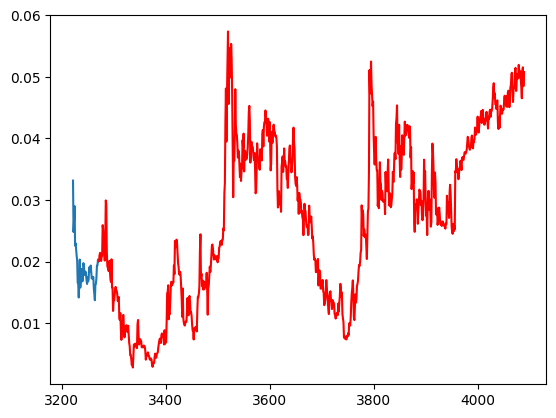

In [140]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression(fit_intercept=False, positive=False)
clf.fit(xtrain,ytrain)
score = clf.score(xtest,ytest)
print('score is:',score)

ypred = clf.predict(xtest)
error = MAE(ytest,ypred)
print('error is:',error)

final_df = pd.DataFrame({'linear':{'acc':score,'error':error,}})

plt.plot(ytrain[len(xtrain)-50:len(xtrain)])
plt.plot(range(len(ytrain),len(ytrain) + len(ypred)), ypred, color='r')
plt.show()

0.9215457582486085
0.002372344262768945


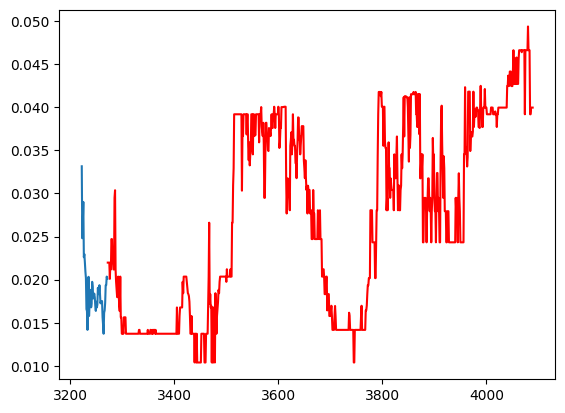

In [141]:
from sklearn import tree

clf = tree.DecisionTreeRegressor(criterion='friedman_mse', splitter='best', max_depth=None)

clf = clf.fit(xtrain,ytrain)
score = clf.score(xtest,ytest)
print(score)

ypred = clf.predict(xtest)
error = MAE(ytest,ypred)
print(error)

final_df['Decision Tree'] = [score,error]

plt.plot(ytrain[len(xtrain)-50:len(xtrain)])
plt.plot(range(len(ytrain),len(ytrain) + len(ypred)), ypred, color='r')
plt.show()

-0.1939953752020418
0.01212231761170895


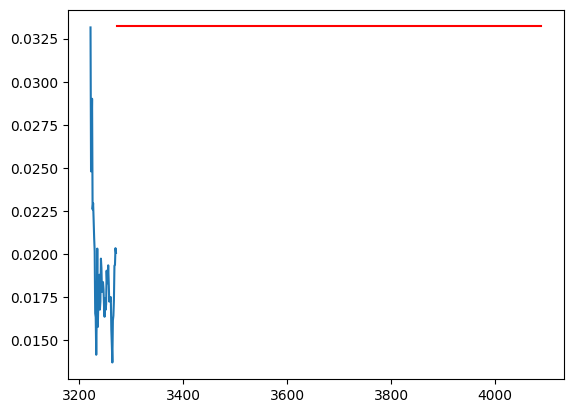

In [142]:
from sklearn import svm

clf = svm.SVR()
clf = clf.fit(xtrain,ytrain)
score = clf.score(xtest,ytest)
print(score)

ypred = clf.predict(xtest)
error = MAE(ytest,ypred)
print(error)

final_df['SVM'] = [score,error]

plt.plot(ytrain[len(xtrain)-50:len(xtrain)])
plt.plot(range(len(ytrain),len(ytrain) + len(ypred)), ypred, color='r')
plt.show()

0.3189516683992062
0.01118971028859654


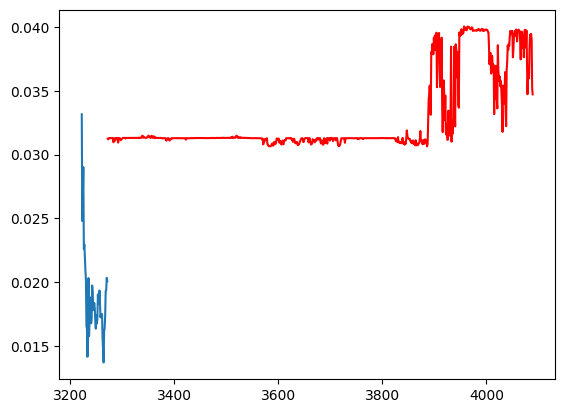

In [143]:
from sklearn.neighbors import KNeighborsRegressor

score = 0

for neighbor in range(1,500):
    try:
        clf = KNeighborsRegressor(n_neighbors=neighbor)
        clf = clf.fit(xtrain,ytrain)
        score2 = clf.score(xtest,ytest)
        if score2 > score:
            score = score2
            clf2 = clf
    except:
        pass

print(score)

ypred = clf.predict(xtest)
error = MAE(ytest,ypred)
print(error)

final_df['KNN'] = [score,error]

plt.plot(ytrain[len(xtrain)-50:len(xtrain)])
plt.plot(range(len(ytrain),len(ytrain) + len(ypred)), ypred, color='r')
plt.show()

0.906131718330986
0.0029905847011609437


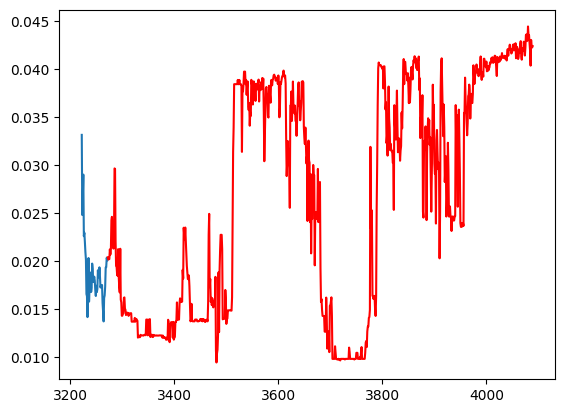

In [144]:
from sklearn.ensemble import RandomForestRegressor 

score = 0 

for n_estimators in range(1,10):
    for random_state in range(1,10):
        clf = RandomForestRegressor(n_estimators=n_estimators, random_state=random_state)
        clf = clf.fit(xtrain,ytrain)
        score2 = clf.score(xtest,ytest)
        if score2 > score:
            score = score2
            clf2 = clf
clear_output()
print(score2)

ypred = clf.predict(xtest)
error = MAE(ytest,ypred)
print(error)

final_df['Random Forest'] = [score,error]

plt.plot(ytrain[len(xtrain)-50:len(xtrain)])
plt.plot(range(len(ytrain),len(ytrain) + len(ypred)), ypred, color='r')
plt.show()

0.9621034531785989
0.0016602007515981983


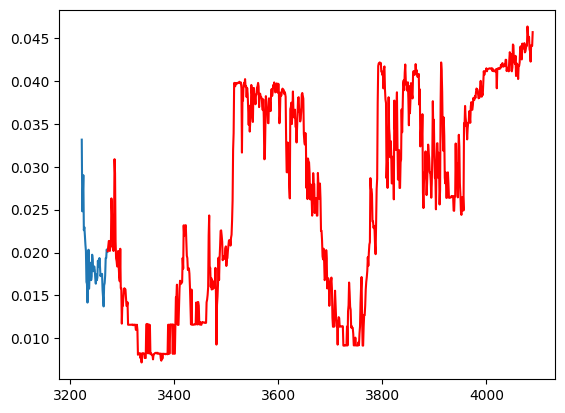

In [145]:
from sklearn.ensemble import GradientBoostingRegressor

clf = GradientBoostingRegressor()
clf = clf.fit(xtrain,ytrain)
score = clf.score(xtest,ytest)
print(score)

ypred = clf.predict(xtest)
error = MAE(ytest,ypred)
print(error)

final_df['Gradiant Boosting'] = [score,error]

plt.plot(ytrain[len(xtrain)-50:len(xtrain)])
plt.plot(range(len(ytrain),len(ytrain) + len(ypred)), ypred, color='r')
plt.show()

-19.269371465083562
0.05464202405738536


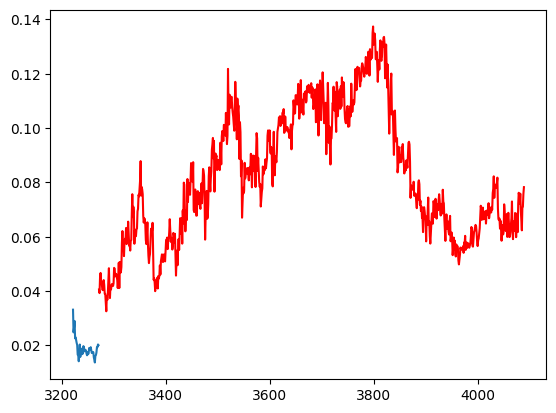

In [146]:
from sklearn.neural_network import MLPRegressor

clf = MLPRegressor()
clf = clf.fit(xtrain,ytrain)
score = clf.score(xtest,ytest)
print(score)

ypred = clf.predict(xtest)
error = MAE(ytest,ypred)
print(error)

final_df['MLP'] = [score,error]

plt.plot(ytrain[len(xtrain)-50:len(xtrain)])
plt.plot(range(len(ytrain),len(ytrain) + len(ypred)), ypred, color='r')
plt.show()

In [147]:
final_df.T

,acc,error
linear,1.000000,1.588106e-15
Decision Tree,0.921546,2.372344e-03
SVM,-0.193995,1.212232e-02
KNN,0.318952,1.118971e-02
Random Forest,0.947613,2.990585e-03
Gradiant Boosting,0.962103,1.660201e-03
MLP,-19.269371,5.464202e-02
